<a href="https://colab.research.google.com/github/sofiiakasaeva/JupyterNotebooks/blob/main/HSE_Lab_(linear_regression)_Sofiia_Kasaeva_237_23_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).
На лекциях было показано, что в этом случае проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k.$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени — это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} =
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ — это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} =
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест

После того как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2.$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна библиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это надстройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

При выполнении этой лабораторной вы столкнётесь с необходимостью рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

In [ ]:
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

### Задание 1. Метод наименьших квадратов (3 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором — тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — $n$ точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача — по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [ ]:
data_train = np.loadtxt('/content/sample_data/train.txt', delimiter=',')
data_test = np.loadtxt('/content/sample_data/test.txt', delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$:

In [ ]:
X_train = data_train[:,0]
y_train = data_train[:,1]
x_test = data_test[:,0]
y_test = data_test[:,1]

# Сделайте то же для тестовой выборки
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**1. [0.1 балла]** Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
X_train = np.reshape(X_train, (X_train.size, 1))
X_ones = np.reshape(np.ones(X_train.size), (X_train.size, 1))
X = np.concatenate((X_train, X_ones), axis=1)
Y = np.linalg.inv(X.T @ X) @ X.T @ y_train.T
print(Y[0], '* x +', Y[1])

2.279134498051949 * x + 4.433230905064934


**2. [0.15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

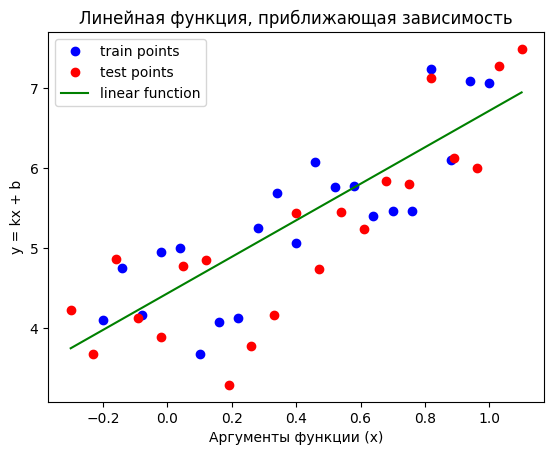

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
plt.title("Линейная функция, приближающая зависимость")
plt.xlabel("Аргументы функции (x)")
plt.ylabel("y = kx + b")
plt.plot(X_train, y_train,'bo', label="train points")
plt.plot(x_test, y_test,'ro', label="test points")
x_points = np.array([min(X_train[0], x_test[0]), max(X_train[-1], x_test[-1])])
y_points = np.array([Y[0] * x_points[0] + Y[1], Y[0] * x_points[1] + Y[1]])
plt.plot(x_points, y_points, 'green', label="linear function")
plt.legend()
plt.show()

**3. [0.15 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и напечатайте его в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
# возьмем многочлен Лагранжа, так как у нас 21 точка, то через 21 точку мы можем единственным образом построить многочлен <= 20 степени,
# а значит выгоднее всего нам брать многочлен 20 степени
# построим многочлен
X1 = np.vander(X_train.reshape(1, 21)[0], 21)
for i in range(21):
  X1[i] = np.flip(X1[i])
B1 = y_train.reshape((21, 1))
arr_of_coef = sla.solve(X1, B1)
arr_of_coef = arr_of_coef.reshape(1, 21)[0]
print(np.polynomial.Polynomial(arr_of_coef))

3.21378739 - 0.91788582·x + 3274.47561992·x² - 59033.87981817·x³ -
170395.59078201·x⁴ + 10744729.48998746·x⁵ - 75881520.38793567·x⁶ -
(1.04540937e+08)·x⁷ + (4.02520041e+09)·x⁸ - (2.14081507e+10)·x⁹ +
(2.72432594e+10)·x¹⁰ + (2.33950201e+11)·x¹¹ - (1.542603e+12)·x¹² +
(4.93783386e+12)·x¹³ - (1.02378026e+13)·x¹⁴ + (1.4739588e+13)·x¹⁵ -
(1.49644089e+13)·x¹⁶ + (1.05581264e+13)·x¹⁷ - (4.94081462e+12)·x¹⁸ +
(1.38121573e+12)·x¹⁹ - (1.74775355e+11)·x²⁰


**4. [0.1 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок.

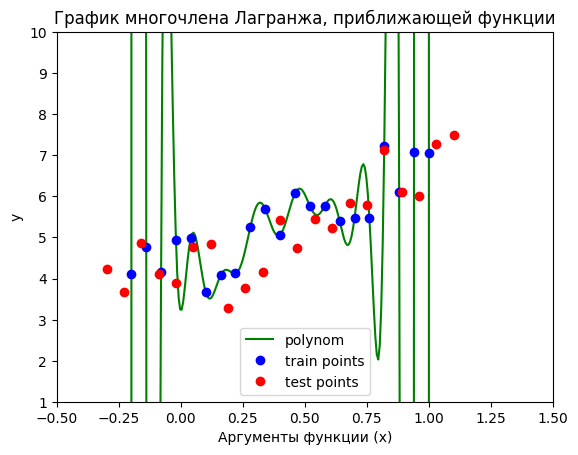

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
plt.title("График многочлена Лагранжа, приближающей функции")
plt.xlabel("Аргументы функции (x)")
plt.ylabel("y")
x = np.linspace(-3, 3, 1000)
y = np.vander(x, 21, increasing=True) @ arr_of_coef.reshape((21, 1))
plt.plot(x, y, 'green', label="polynom")
plt.plot(X_train, y_train, 'bo', label="train points")
plt.plot(x_test, y_test, 'ro', label="test points")
plt.xlim([-0.5, 1.5])
plt.ylim([1, 10])
plt.legend()
plt.show()

**5. [0.25 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Напечатайте найденные многочлены в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [ ]:
def polynom_k(k, x, y):
  X = np.vander(X_train.reshape(1, 21)[0], k + 1)
  for i in range(21):
    X[i] = np.flip(X[i])
  Y = np.linalg.inv(X.T @ X) @ X.T @ y_train.T
  return np.polynomial.Polynomial(Y)

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
for i in range(1, 11):
  print(i, ":")
  print(polynom_k(i, X_train, y_train))


1 :
4.43323091 + 2.2791345·x
2 :
4.4724765 + 1.15783169·x + 1.40162851·x²
3 :
4.46073636 + 1.06501611·x + 1.85975084·x² - 0.3817686·x³
4 :
4.34116612 + 1.17180239·x + 6.79409178·x² - 13.05132812·x³ + 7.9184747·x⁴
5 :
4.43129781 - 0.13059804·x + 3.2747144·x² + 21.37479628·x³ -
51.13148139·x⁴ + 29.52497804·x⁵
6 :
4.38379501 - 4.59717933·x + 16.00290399·x² + 121.25709714·x³ -
481.51013291·x⁴ + 581.45329827·x⁵ - 229.97013343·x⁶
7 :
4.44451271 - 4.00889591·x + 7.2154586·x² + 119.35078429·x³ -
314.23117261·x⁴ + 122.87821729·x⁵ + 238.69936764·x⁶ - 167.38196468·x⁷
8 :
4.66378905 - 5.18277323·x - 26.69563144·x² + 268.86044111·x³ +
109.89568099·x⁴ - 3132.85646741·x⁵ + 6760.62861122·x⁶ - 5701.71031128·x⁷ +
1729.47760767·x⁸
9 :
4.64588338 - 4.55270225·x - 24.26273528·x² + 219.04208586·x³ +
176.24535429·x⁴ - 2441.96275014·x⁵ + 3913.26847272·x⁶ - 1216.44881475·x⁷ -
1522.0978206·x⁸ + 903.21538272·x⁹
10 :
4.669176 - 2.15984762·x - 36.17544485·x² + 44.93537043·x³ +
1201.95410569·x⁴ - 1660.82442368·x⁵ -

**6. [1 балл]** Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором — по парам из тестовых данных).

In [ ]:
def error(k, x, y):
  pol = polynom_k(k, x, y)
  sum = 0
  x = x.reshape(1, 21)[0]
  for i in range(21):
    sum += (pol(x[i]) - y[i])**2
  return sum / 21

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
for i in range(1, 11):
  print(i, ":")
  print("train error:", error(i, X_train, y_train))
  print("test error:", error(i, x_test, y_test))

1 :
train error: 0.2968966332625196
test error: 0.4351202004048882
2 :
train error: 0.2696989158766914
test error: 0.35647628878312315
3 :
train error: 0.2694971871479611
test error: 0.35534645715182
4 :
train error: 0.2610665330579277
test error: 0.4417270189285086
5 :
train error: 0.24998504648317513
test error: 0.5579732021576886
6 :
train error: 0.18829348988370226
test error: 2.5816929333075445
7 :
train error: 0.1853962115329453
test error: 2.5157829037873984
8 :
train error: 0.1590555657908981
test error: 4.357288784358222
9 :
train error: 0.15847184274740833
test error: 4.776337672940166
10 :
train error: 0.15316610999537042
test error: 14.632460228996766


**7. [0.75 балла]** Для $k = 1,2,3,4,5,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

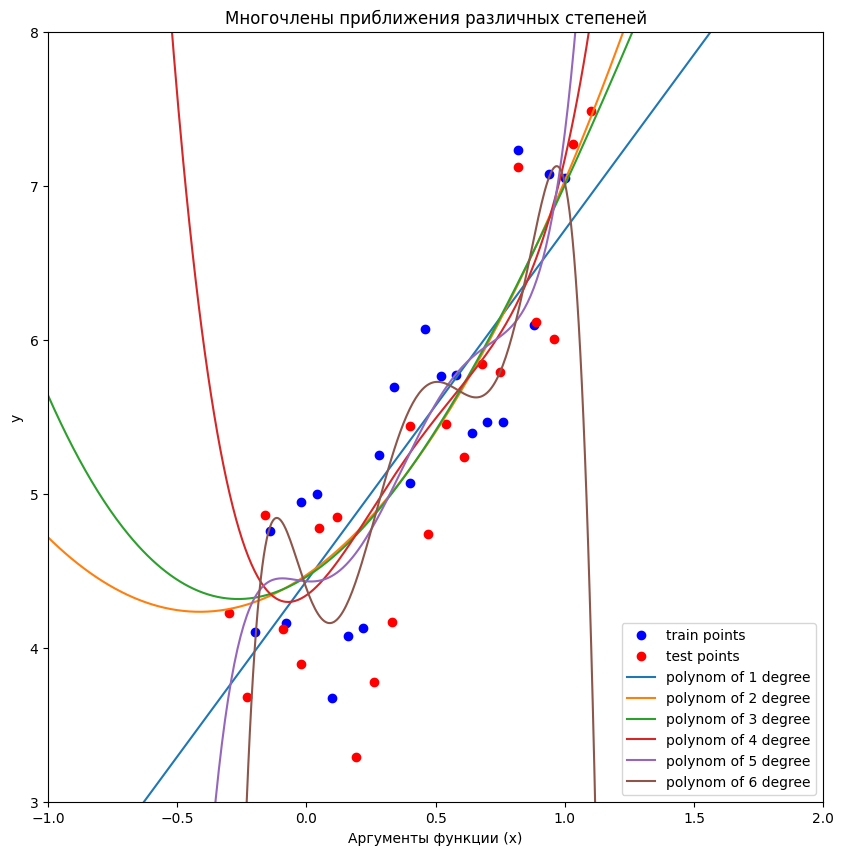

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
plt.figure(figsize=(10, 10))
plt.title("Многочлены приближения различных степеней")
plt.xlabel("Аргументы функции (x)")
plt.ylabel("y")
plt.plot(X_train, y_train, 'bo', label="train points")
plt.plot(x_test, y_test, 'ro', label="test points")
x = np.linspace(-3, 3, 1000)
for i in range(1, 7):
  y = polynom_k(i, X_train, y_train)(x)
  plt.plot(x, y, label=f"polynom of {i} degree")
plt.xlim([-1, 2])
plt.ylim([3, 8])
plt.legend()
plt.show()

**8. [0.5 балла]** Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как, по вашему мнению, в машинном обучении называется наблюдаемый вами эффект?

Как можно заметить, при росте степени многочлена ошибка увеличивается, хотя казалось, что при увеличении многочлена, ошибка должна все больше стремиться к нулю. При увелечении степени многочлена программа становится оптимальнее только для обучающих данных, в то время как для тестовых ошибка становится намного больше. Это явление называется переобучение, то есть программа слишком хорошо обучается на обучающихся данных, при этом плохо моделирует модель на всех остальных данных(тестовых)